In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
dataset = pd.read_csv('./Datasets/winequality.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [4]:
# ищем пропуски
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

In [5]:
# разделение на объекты-признаки и целевой признак
X = dataset.iloc[:, dataset.columns != 'quality'].values 
y = dataset.iloc[:, -1].values


In [6]:
 X[0]

array([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 0,
       'red'], dtype=object)

In [7]:
 y

array(['red', 'red', 'red', ..., 'white', 'white', 'white'], dtype=object)

In [8]:
# кодируем категориальные данные из строк в числа
# le = LabelEncoder()
# y = le.fit_transform(y)
# y

In [8]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 7.4, ..., 0.56, 9.4, 0],
       [1.0, 0.0, 7.8, ..., 0.68, 9.8, 0],
       [1.0, 0.0, 7.8, ..., 0.65, 9.8, 0],
       ...,
       [0.0, 1.0, 6.5, ..., 0.46, 9.4, 0],
       [0.0, 1.0, 5.5, ..., 0.38, 12.8, 1],
       [0.0, 1.0, 6.0, ..., 0.32, 11.8, 0]], dtype=object)

In [9]:
# 1.Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
# X_train[0]

In [12]:
# скалирование полей X
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# start = 1
# X_train[:, start:] = sc.fit_transform(X_train[:, start:])
# X_test[:, start:] = sc.transform(X_test[:, start:])

In [13]:
# X_train[0]

In [10]:
# 2.Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=50)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9370790840869733, 0.936923076923077)

In [11]:
# 3.Оценка качества модели с использованием кросс-валидации
# cv=20
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors=50), X, y, cv=20)
scores1, np.mean(scores1)

(array([0.92307692, 0.89538462, 0.90153846, 0.93538462, 0.94153846,
        0.96615385, 0.94153846, 0.92923077, 0.95692308, 0.92615385,
        0.94461538, 0.93538462, 0.96307692, 0.96307692, 0.93846154,
        0.92      , 0.94769231, 0.92592593, 0.9382716 , 0.94753086]),
 0.937047958214625)

In [12]:
# cv=5
scores = cross_val_score(KNeighborsClassifier(n_neighbors=50), X, y, c3v=5)
scores, np.mean(scores)

(array([0.91153846, 0.94307692, 0.93918399, 0.94457275, 0.93995381]),
 0.9356651862379344)

In [23]:
# 4.Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(5,60,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])}]

In [11]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

CPU times: total: 4.83 s
Wall time: 4.86 s


{'n_neighbors': 5}

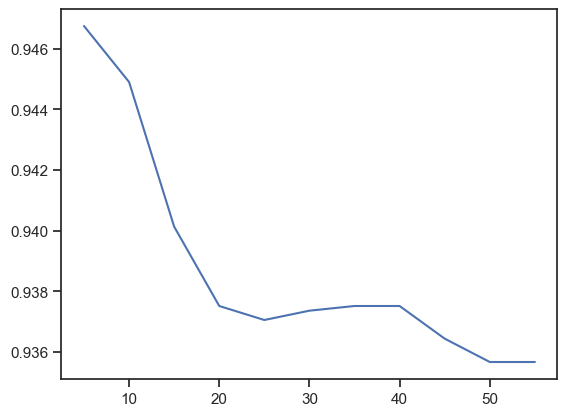

In [12]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [16]:
%%time
# Повторный подбор
n_range = np.array(range(1,10,1))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

CPU times: total: 3.58 s
Wall time: 3.62 s


{'n_neighbors': 1}

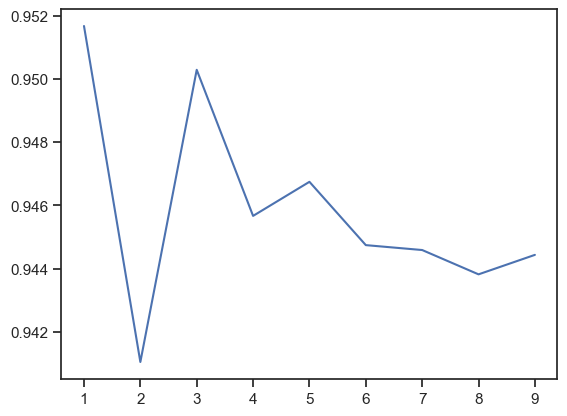

In [17]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [18]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров 
clf_gs.best_estimator_.fit(X_train, y_train)
target2_0 = clf_gs.best_estimator_.predict(X_train)
target2_1 = clf_gs.best_estimator_.predict(X_test)
# Новое качество модели
accuracy_score(y_train, target2_0), accuracy_score(y_test, target2_1)

(1.0, 0.9676923076923077)

In [19]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9370790840869733, 0.936923076923077)

In [24]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [25]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

CPU times: total: 5.03 s
Wall time: 5.13 s


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

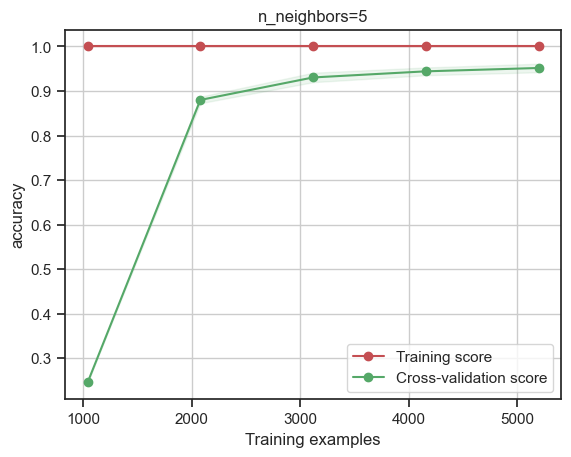

In [31]:
%%time
# 6.Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=5', X, y, cv=5, train_sizes=np.linspace(.2, 1.0, 5))

CPU times: total: 22.8 s
Wall time: 23.3 s


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

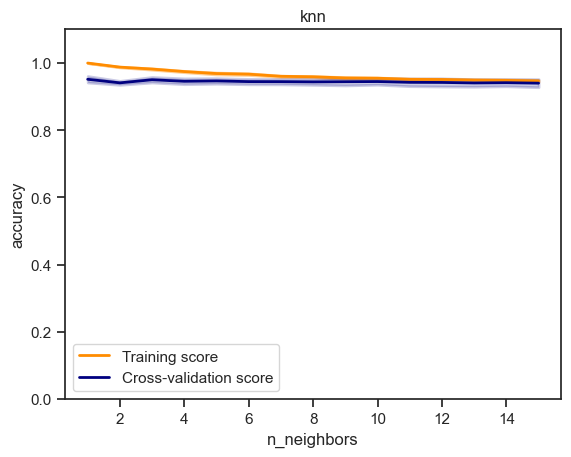

In [28]:
%%time
n_range2 = np.array(range(1,16,1))
plot_validation_curve(clf_gs.best_estimator_, 'knn', X, y, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=5, scoring="accuracy")